# Palmer Penguins Classification

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d martaarroyo/palmer-penguins-for-binary-classification

Dataset URL: https://www.kaggle.com/datasets/martaarroyo/palmer-penguins-for-binary-classification
License(s): Attribution 4.0 International (CC BY 4.0)
  0%|                                               | 0.00/2.42k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 2.42k/2.42k [00:00<00:00, 11.8MB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Palmer Penguins classification/palmer-penguins-for-binary-classification.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Palmer Penguins classification')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('penguins_binary_classification.csv')

In [5]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007


In [6]:
df.shape

(274, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            274 non-null    object 
 1   island             274 non-null    object 
 2   bill_length_mm     274 non-null    float64
 3   bill_depth_mm      274 non-null    float64
 4   flipper_length_mm  274 non-null    float64
 5   body_mass_g        274 non-null    float64
 6   year               274 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 15.1+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,274.0,42.702920,5.195566,32.1,38.35,42.0,46.675,59.6
bill_depth_mm,274.0,16.836131,2.013410,13.1,15.00,17.0,18.500,21.5
flipper_length_mm,274.0,202.178832,15.047938,172.0,190.00,198.0,215.000,231.0
body_mass_g,274.0,4318.065693,835.933105,2850.0,3600.00,4262.5,4950.000,6300.0
year,274.0,2008.043796,0.806281,2007.0,2007.00,2008.0,2009.000,2009.0


In [9]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
year                 0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.nunique()

species                2
island                 3
bill_length_mm       146
bill_depth_mm         78
flipper_length_mm     54
body_mass_g           89
year                   3
dtype: int64

In [12]:
df['species'].value_counts()

species
Adelie    151
Gentoo    123
Name: count, dtype: int64

## Data Visualization

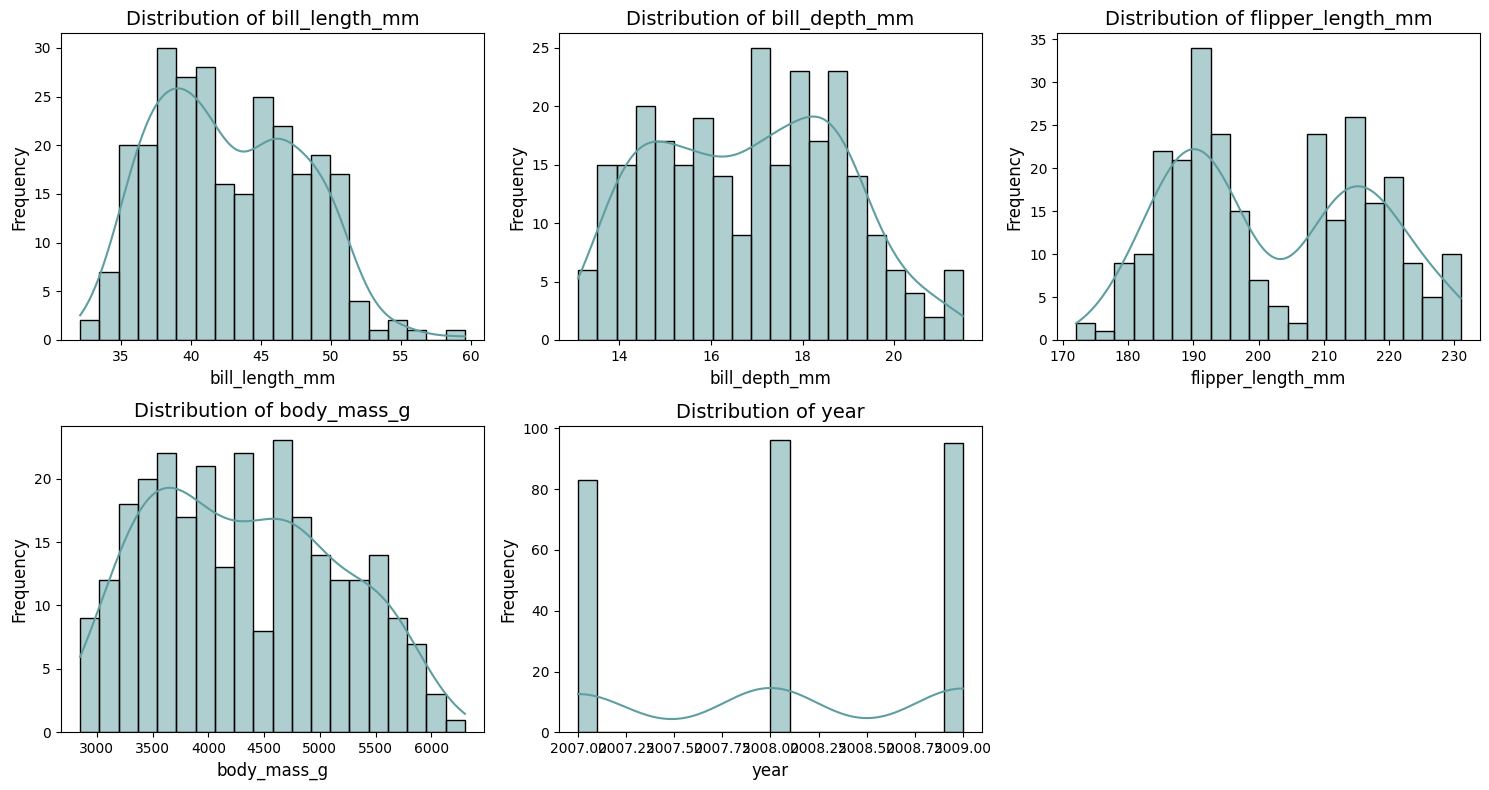

In [13]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

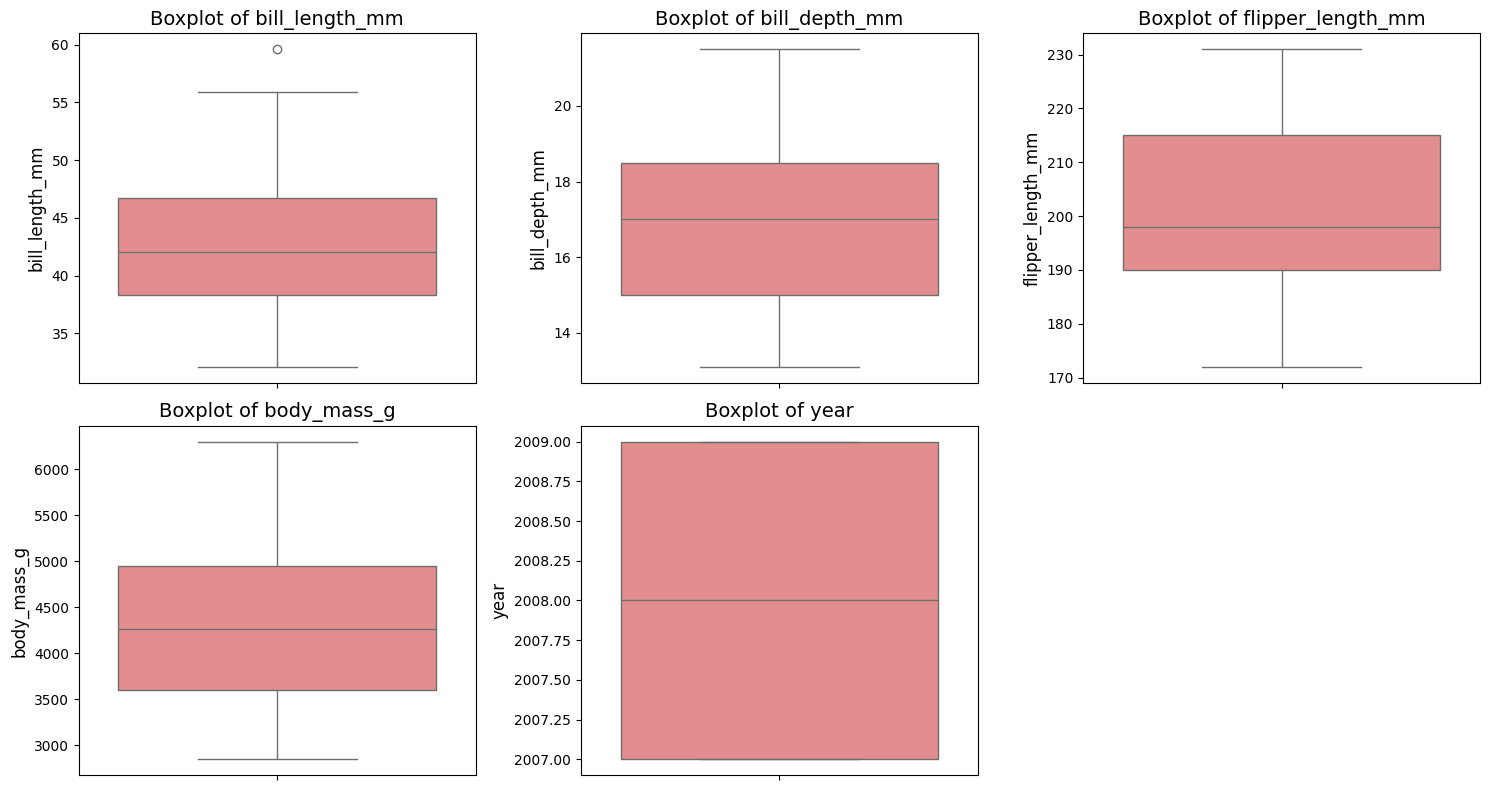

In [14]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

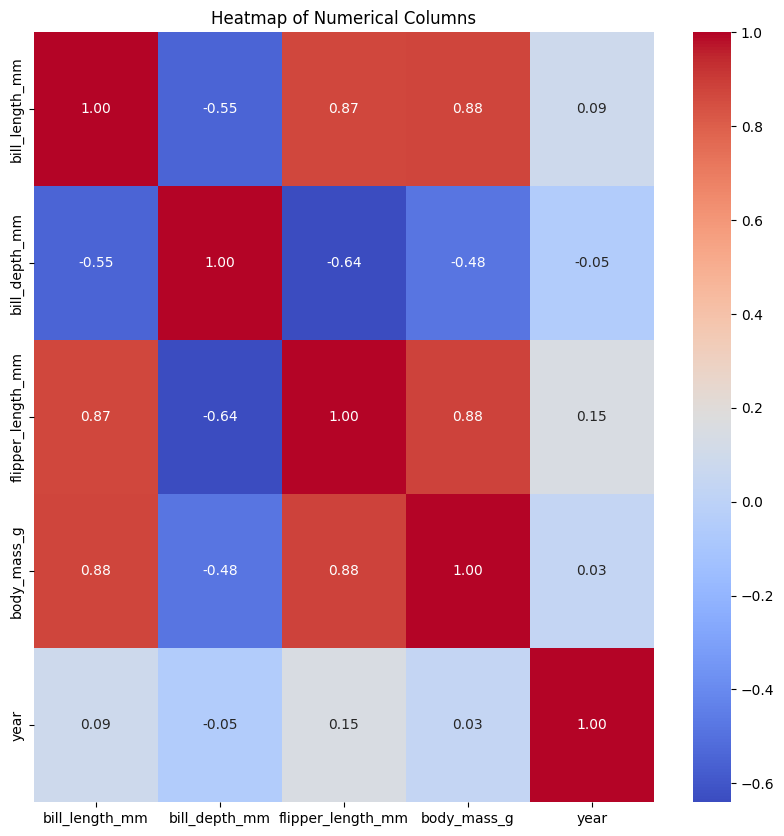

In [15]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preparation

In [16]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [17]:
X = df.drop('species', axis=1)
y = df['species']

In [18]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

In [20]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [22]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        25

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55

Confusion Matrix:
 [[30  0]
 [ 0 25]]


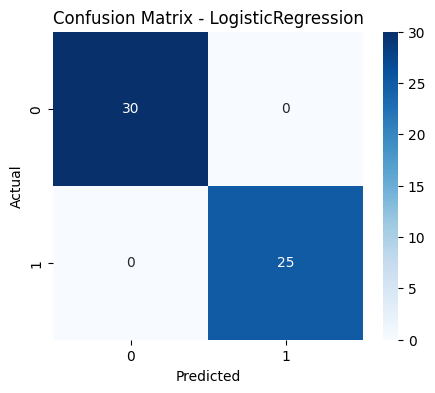

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        25

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55

Confusion Matrix:
 [[30  0]
 [ 0 25]]


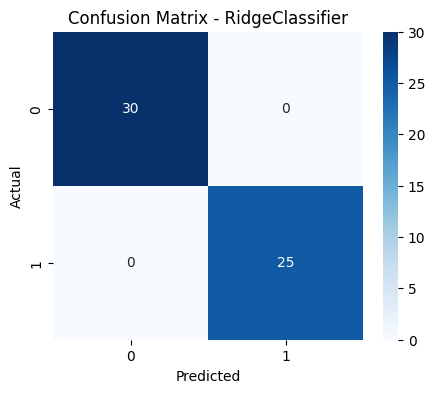

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        25

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55

Confusion Matrix:
 [[30  0]
 [ 0 25]]


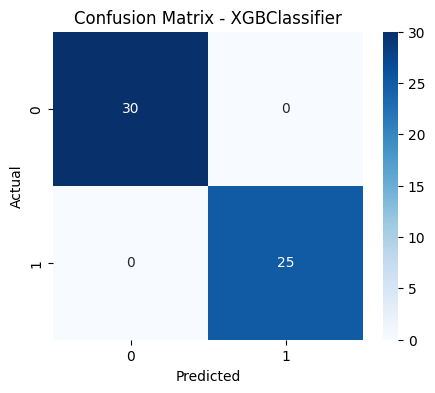

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        25

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55

Confusion Matrix:
 [[30  0]
 [ 0 25]]


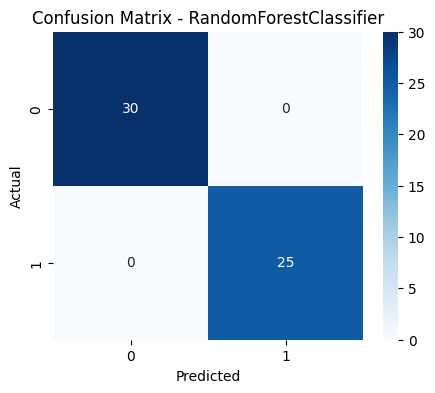

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        25

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55

Confusion Matrix:
 [[30  0]
 [ 0 25]]


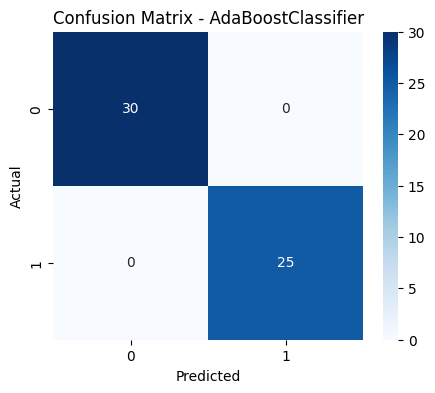

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        25

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55

Confusion Matrix:
 [[30  0]
 [ 0 25]]


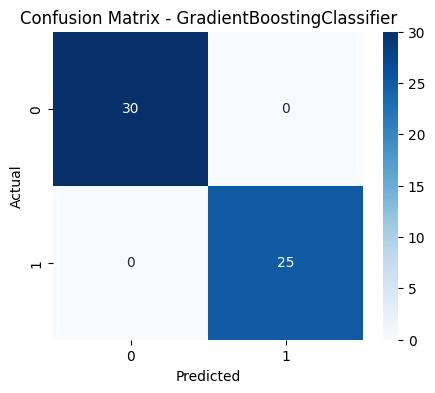

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        25

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55

Confusion Matrix:
 [[30  0]
 [ 0 25]]


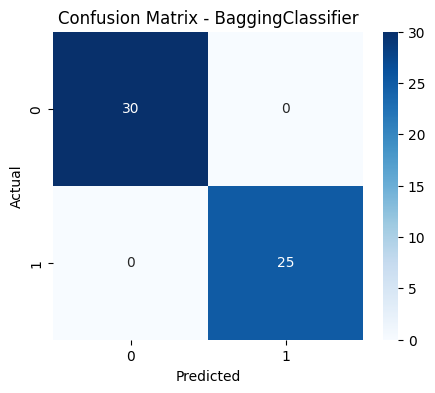

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        25

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55

Confusion Matrix:
 [[30  0]
 [ 0 25]]


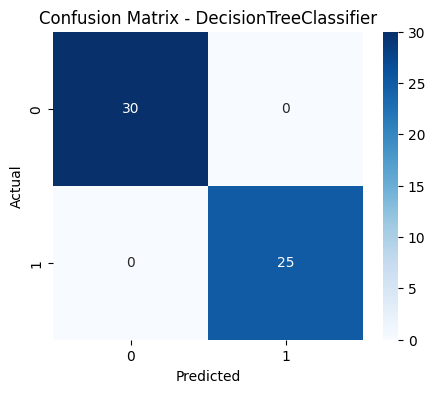

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        25

    accuracy                           1.00        55
   macro avg       1.00      1.00      1.00        55
weighted avg       1.00      1.00      1.00        55

Confusion Matrix:
 [[30  0]
 [ 0 25]]


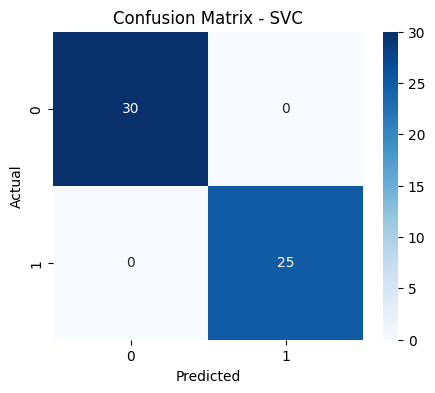

In [23]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()